## Pre_prossesing

In [85]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
#from hawkeslib.model.mv_exp import MultivariateExpHawkesProcess as MVHP


message_data_path = "../data/message_data.csv"
orderbook_data_path = "../data/orderbook_data.csv"

message_data = pd.read_csv(message_data_path, header=None)
lob_data = pd.read_csv(orderbook_data_path, header=None)



In [86]:
message_data.columns = ['Time', 'Type', 'OrderID', 'Size', 'Price', 'Direction']

message_data.head()

,Time,Type,OrderID,Size,Price,Direction
0,34200.004241,1,16113575,18,5853300,1
1,34200.004261,1,16113584,18,5853200,1
2,34200.004447,1,16113594,18,5853100,1
3,34200.025552,1,16120456,18,5859100,-1
4,34200.025580,1,16120480,18,5859200,-1


In [87]:
def rename_lob_columns(data):
    cols = ['ask_price', 'ask_size', 'bid_price', 'bid_size']
    new_column_names = []
    num_levels = len(data.columns) // len(cols) # how many group of 4
    for i in range(num_levels):
        new_column_names.extend(f"{name}_{i+1}" for name in cols)

    # Rename the columns
    data.columns = new_column_names
    return data

lob_data = rename_lob_columns(lob_data)
lob_data.head()

,ask_price_1,ask_size_1,bid_price_1,bid_size_1,ask_price_2,ask_size_2,bid_price_2,bid_size_2,ask_price_3,ask_size_3,...,bid_price_8,bid_size_8,ask_price_9,ask_size_9,bid_price_9,bid_size_9,ask_price_10,ask_size_10,bid_price_10,bid_size_10
0,5859400,200,5853300,18,5859800,200,5853000,150,5861000,200,...,5845300,300,5876500,1160,5843800,200,5879000,500,5842700,300
1,5859400,200,5853300,18,5859800,200,5853200,18,5861000,200,...,5846500,300,5876500,1160,5845300,300,5879000,500,5843800,200
2,5859400,200,5853300,18,5859800,200,5853200,18,5861000,200,...,5849300,300,5876500,1160,5846500,300,5879000,500,5845300,300
3,5859100,18,5853300,18,5859400,200,5853200,18,5859800,200,...,5849300,300,5873900,100,5846500,300,5876500,1160,5845300,300
4,5859100,18,5853300,18,5859200,18,5853200,18,5859400,200,...,5849300,300,5871000,10,5846500,300,5873900,100,5845300,300


In [88]:
# merge
lob_data['Time'] = message_data['Time']
merge_df = lob_data.merge(message_data, on='Time', how='inner')
merge_df.head()

,ask_price_1,ask_size_1,bid_price_1,bid_size_1,ask_price_2,ask_size_2,bid_price_2,bid_size_2,ask_price_3,ask_size_3,...,ask_price_10,ask_size_10,bid_price_10,bid_size_10,Time,Type,OrderID,Size,Price,Direction
0,5859400,200,5853300,18,5859800,200,5853000,150,5861000,200,...,5879000,500,5842700,300,34200.004241,1,16113575,18,5853300,1
1,5859400,200,5853300,18,5859800,200,5853200,18,5861000,200,...,5879000,500,5843800,200,34200.004261,1,16113584,18,5853200,1
2,5859400,200,5853300,18,5859800,200,5853200,18,5861000,200,...,5879000,500,5845300,300,34200.004447,1,16113594,18,5853100,1
3,5859100,18,5853300,18,5859400,200,5853200,18,5859800,200,...,5876500,1160,5845300,300,34200.025552,1,16120456,18,5859100,-1
4,5859100,18,5853300,18,5859200,18,5853200,18,5859400,200,...,5873900,100,5845300,300,34200.025580,1,16120480,18,5859200,-1


In [89]:
# Delete Type==5
merge_df = merge_df[merge_df['Type'] != 5]

# Compute the mid_price
merge_df['mid_price'] = (merge_df['ask_price_1'] + merge_df['bid_price_1']) / 2

# Calculate the  directtion

merge_df['calc_direction'] = np.where(merge_df['mid_price']< merge_df['Price'], 'Buy', 'Sell')

merge_df.drop('Direction', axis=1, inplace=True)

merge_df.head()

,ask_price_1,ask_size_1,bid_price_1,bid_size_1,ask_price_2,ask_size_2,bid_price_2,bid_size_2,ask_price_3,ask_size_3,...,ask_size_10,bid_price_10,bid_size_10,Time,Type,OrderID,Size,Price,mid_price,calc_direction
0,5859400,200,5853300,18,5859800,200,5853000,150,5861000,200,...,500,5842700,300,34200.004241,1,16113575,18,5853300,5856350.0,Sell
1,5859400,200,5853300,18,5859800,200,5853200,18,5861000,200,...,500,5843800,200,34200.004261,1,16113584,18,5853200,5856350.0,Sell
2,5859400,200,5853300,18,5859800,200,5853200,18,5861000,200,...,500,5845300,300,34200.004447,1,16113594,18,5853100,5856350.0,Sell
3,5859100,18,5853300,18,5859400,200,5853200,18,5859800,200,...,1160,5845300,300,34200.025552,1,16120456,18,5859100,5856200.0,Buy
4,5859100,18,5853300,18,5859200,18,5853200,18,5859400,200,...,100,5845300,300,34200.025580,1,16120480,18,5859200,5856200.0,Buy


In [90]:
# New col called event_type which map Type + calc_direction and output [1,2,3,4,5,6,7,8]
merge_df['event_type'] = merge_df['Type'].astype(str) + '_' + merge_df['calc_direction'].astype(str)
merge_df['event_type'] = merge_df['event_type'].replace(
    {'1_Sell': 1, '1_Buy': 2, '2_Sell': 3, '2_Buy': 4,
     '3_Sell': 5, '3_Buy': 6, '4_Sell': 7, '4_Buy': 8}
)

merge_df['event_type'].unique()


/var/folders/y5/f3yrmbzn2jq1rcxqy582qldm0000gn/T/ipykernel_25089/1001220004.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merge_df['event_type'] = merge_df['event_type'].replace(


array([1, 2, 5, 6, 7, 8, 4, 3])

In [91]:
merge_df.head()

,ask_price_1,ask_size_1,bid_price_1,bid_size_1,ask_price_2,ask_size_2,bid_price_2,bid_size_2,ask_price_3,ask_size_3,...,bid_price_10,bid_size_10,Time,Type,OrderID,Size,Price,mid_price,calc_direction,event_type
0,5859400,200,5853300,18,5859800,200,5853000,150,5861000,200,...,5842700,300,34200.004241,1,16113575,18,5853300,5856350.0,Sell,1
1,5859400,200,5853300,18,5859800,200,5853200,18,5861000,200,...,5843800,200,34200.004261,1,16113584,18,5853200,5856350.0,Sell,1
2,5859400,200,5853300,18,5859800,200,5853200,18,5861000,200,...,5845300,300,34200.004447,1,16113594,18,5853100,5856350.0,Sell,1
3,5859100,18,5853300,18,5859400,200,5853200,18,5859800,200,...,5845300,300,34200.025552,1,16120456,18,5859100,5856200.0,Buy,2
4,5859100,18,5853300,18,5859200,18,5853200,18,5859400,200,...,5845300,300,34200.025580,1,16120480,18,5859200,5856200.0,Buy,2


In [92]:
df_hawkes = merge_df[['Time', 'event_type']]
df_hawkes.head()

,Time,event_type
0,34200.004241,1
1,34200.004261,1
2,34200.004447,1
3,34200.025552,2
4,34200.025580,2


# Poisson

In [93]:
import pandas as pd
import numpy as np

def generate_poisson_events(rate, time_duration):
    num_events = np.random.poisson(rate * time_duration)
    inter_arrival_times = np.random.exponential(1.0 / rate, num_events)
    event_times = np.cumsum(inter_arrival_times)
    return num_events, event_times, inter_arrival_times

def plot_non_sequential_poisson(num_events, event_times, inter_arrival_times, rate, time_duration):
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle(f'Poisson Process Simulation (λ = {rate}, Duration = {time_duration} seconds)\n', fontsize=16)

    axs[0].step(event_times, np.arange(1, num_events + 1), where='post', color='blue')
    axs[0].set_xlabel('Time')
    axs[0].set_ylabel('Event Number')
    axs[0].set_title(f'Poisson Process Event Times\nTotal: {num_events} events\n')
    axs[0].grid(True)

    axs[1].hist(inter_arrival_times, bins=20, color='green', alpha=0.5)
    axs[1].set_xlabel('Inter-Arrival Time')
    axs[1].set_ylabel('Frequency')
    axs[1].set_title(f'Histogram of Inter-Arrival Times\nMEAN: {np.mean(inter_arrival_times):.2f} | STD: {np.std(inter_arrival_times):.2f}\n')
    axs[1].grid(True, alpha=0.5)
    
    plt.tight_layout()
    plt.show()
    return num_events, event_times, inter_arrival_times

def plot_sequential_poisson(num_events_list, event_times_list, inter_arrival_times_list, rate, time_duration):
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle(f'Poisson Process Simulation (Duration = {time_duration} seconds)\n', fontsize=16)

    axs[0].set_xlabel('Time')
    axs[0].set_ylabel('Event Number')
    axs[0].set_title(f'Poisson Process Event Times')
    axs[0].grid(True)

    axs[1].set_xlabel('Inter-Arrival Time')
    axs[1].set_ylabel('Frequency')
    axs[1].set_title(f'Histogram of Inter-Arrival Times')
    axs[1].grid(True, alpha=0.5)

    color_palette = plt.get_cmap('tab20')
    colors = [color_palette(i) for i in range(len(rate))]

    for n, individual_rate in enumerate(rate):
        num_events = num_events_list[n]
        event_times = event_times_list[n]
        inter_arrival_times = inter_arrival_times_list[n]

        axs[0].step(event_times, np.arange(1, num_events + 1), where='post', color=colors[n], label=f'λ = {individual_rate}, Total Events: {num_events}')
        axs[1].hist(inter_arrival_times, bins=20, color=colors[n], alpha=0.5, label=f'λ = {individual_rate}, MEAN: {np.mean(inter_arrival_times):.2f}, STD: {np.std(inter_arrival_times):.2f}')

    axs[0].legend()
    axs[1].legend()

    plt.tight_layout()
    plt.show()
    return num_events_list, event_times_list, inter_arrival_times_list

def poisson_simulation(rate, time_duration, show_visualization=True):
    if isinstance(rate, (int, float)):
        num_events, event_times, inter_arrival_times = generate_poisson_events(rate, time_duration)
        if show_visualization:
            plot_non_sequential_poisson(num_events, event_times, inter_arrival_times, rate, time_duration)
        return num_events, event_times, inter_arrival_times

    elif isinstance(rate, list):
        num_events_list = []
        event_times_list = []
        inter_arrival_times_list = []

        for individual_rate in rate:
            num_events, event_times, inter_arrival_times = generate_poisson_events(individual_rate, time_duration)
            num_events_list.append(num_events)
            event_times_list.append(event_times)
            inter_arrival_times_list.append(inter_arrival_times)

        if show_visualization:
            plot_sequential_poisson(num_events_list, event_times_list, inter_arrival_times_list, rate, time_duration)
        return num_events_list, event_times_list, inter_arrival_times_list




In [94]:
df_hawkes.shape

(430266, 2)

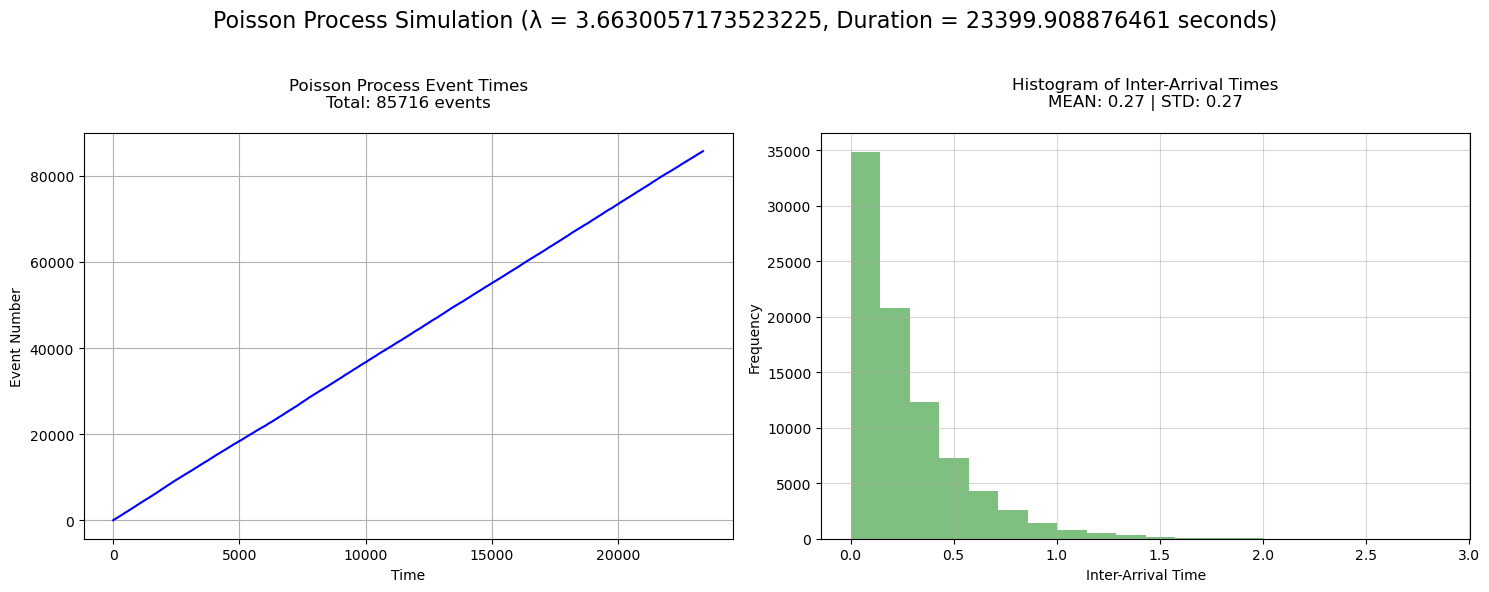

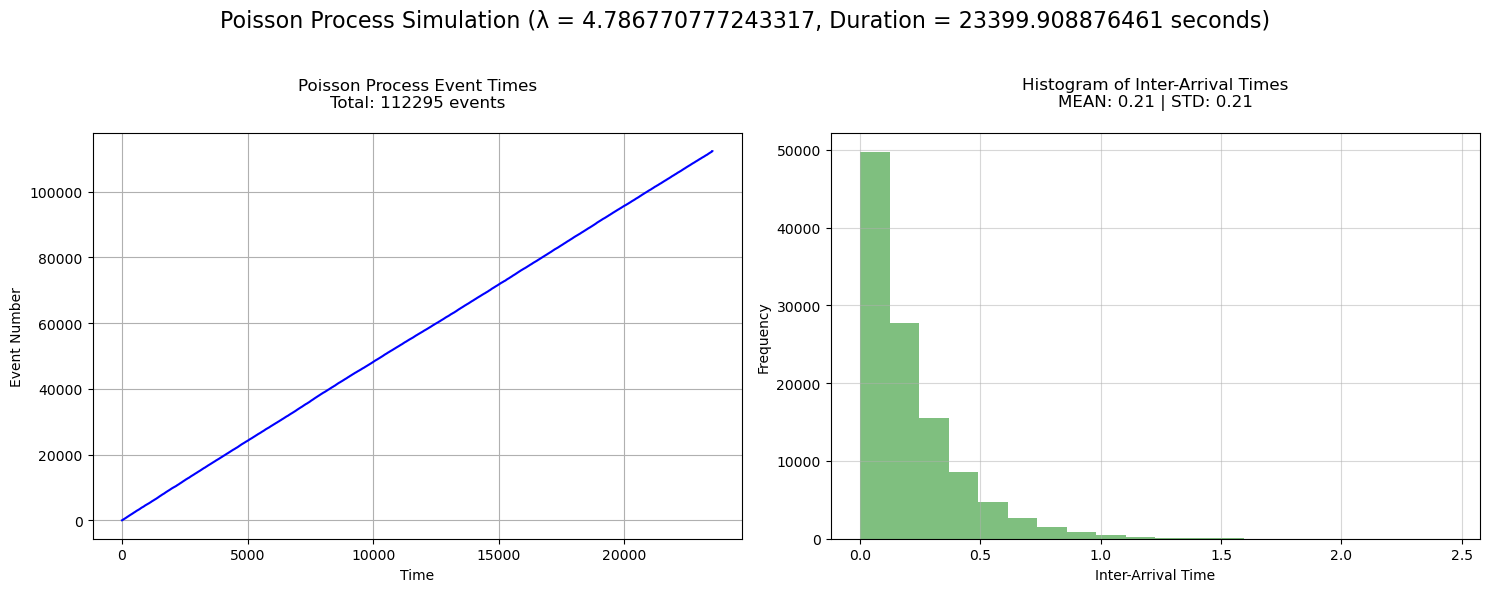

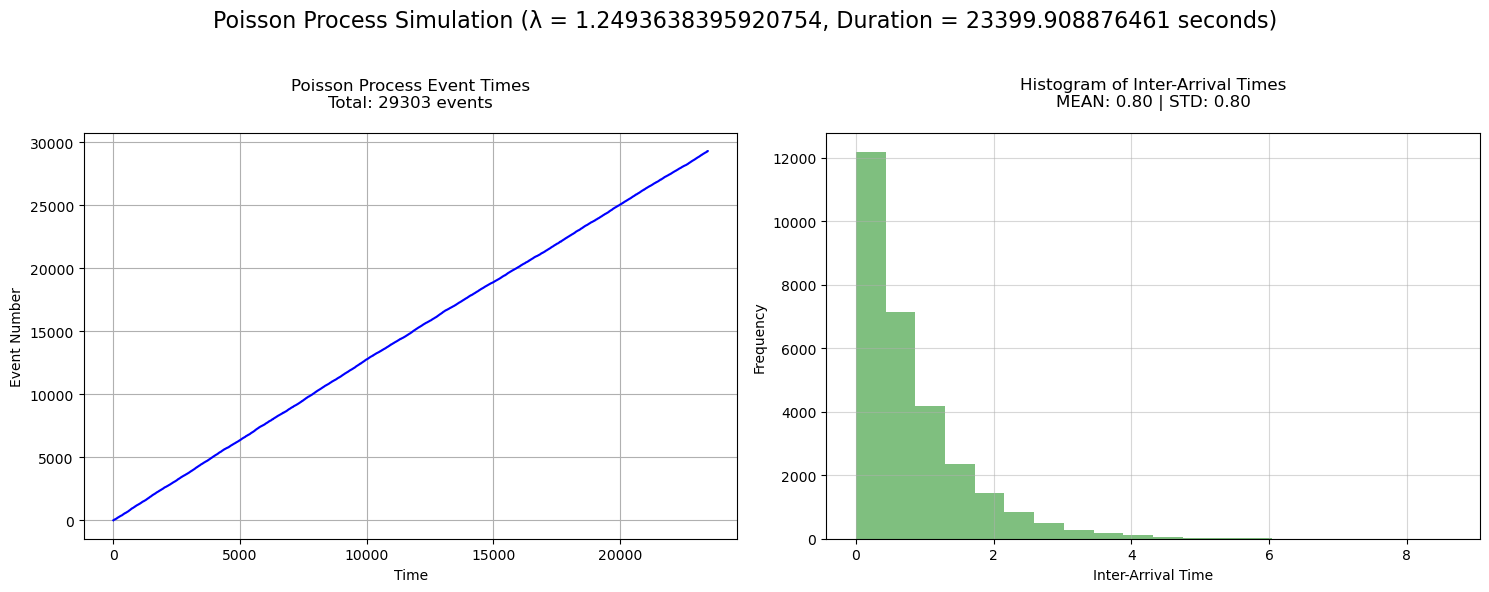

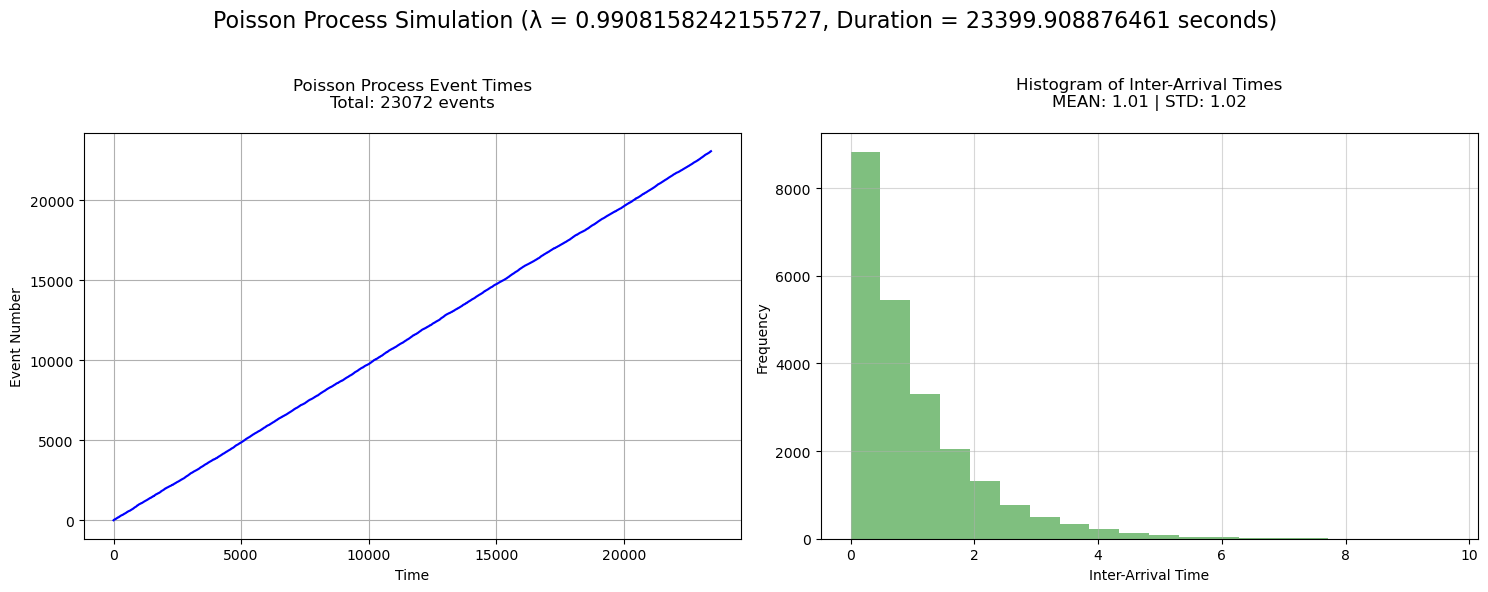

In [95]:
df_hawkes.head()
#Count number of event_type == 1
time_duration = df_hawkes['Time'].max() - df_hawkes['Time'].min()
type_1_count = df_hawkes[df_hawkes['event_type'] == 1].value_counts().sum() #len(df_hawkes[df_hawkes['event_type'] == 1])
type_2_count = df_hawkes[df_hawkes['event_type'] == 2].value_counts().sum()
type_3_count = df_hawkes[df_hawkes['event_type'] == 2].value_counts().sum()
type_4_count = df_hawkes[df_hawkes['event_type'] == 2].value_counts().sum()
type_5_count = df_hawkes[df_hawkes['event_type'] == 2].value_counts().sum()
type_6_count = df_hawkes[df_hawkes['event_type'] == 2].value_counts().sum()
type_7_count = df_hawkes[df_hawkes['event_type'] == 7].value_counts().sum()
type_8_count = df_hawkes[df_hawkes['event_type'] == 8].value_counts().sum()

count_types_list = [type_1_count, type_2_count, type_7_count, type_8_count]

sim_results = {}

for type in count_types_list:
    # Compute the rate
    rate = type / time_duration
    # Simulate
    num_events_list, event_times_list, inter_arrival_times_list = poisson_simulation(rate, time_duration, show_visualization=True)
    #Store the results
    sim_results[type] = {
        'num_events': num_events_list,
        'event_times': event_times_list,
        'inter_arrival_times': inter_arrival_times_list
    }


# rate = type_1_count / time_duration
# print(type_1_count)
# print(time_duration)
# print(rate)


In [96]:
# Calculate the time duration for the whole dataset
time_duration = int(df_hawkes["Time"].max() - df_hawkes["Time"].min())

# Get counts for each type of event
event_types = df_hawkes['event_type'].unique()
event_counts = {etype: df_hawkes[df_hawkes['event_type'] == etype].shape[0] for etype in event_types}

# Run simulations for each event type
sim_results = {}
for event_type, count in event_counts.items():
    rate = count / time_duration
    num_events, event_times, inter_arrival_times = poisson_simulation(rate, time_duration, show_visualization=False)
    sim_results[event_type] = {
        'num_events': num_events,
        'event_times': event_times,
        'inter_arrival_times': inter_arrival_times
    }

In [97]:
# Prepare a DataFrame to store probabilities
timestamps = np.linspace(0, time_duration, num=time_duration + 1)  # Uniform time intervals
probabilities = pd.DataFrame(index=timestamps[:-1])  # Use all but the last element to match histogram output

total_counts_per_bin = np.zeros(len(timestamps) - 1)

# First, accumulate counts from all histograms to normalize later
for event_type, data in sim_results.items():
    event_times = data['event_times']
    hist, _ = np.histogram(event_times, bins=timestamps)
    total_counts_per_bin += hist

# Now, calculate probabilities for each event type at each timestamp
for event_type, data in sim_results.items():
    event_times = data['event_times']
    hist, bins = np.histogram(event_times, bins=timestamps)
    probabilities[event_type] = hist / total_counts_per_bin  # Normalize by total counts per bin

# Fill NaN values that may result from division by zero (no events at all in some bins)
probabilities.fillna(0, inplace=True)

# Check if rows sum to 1
row_sums = probabilities.sum(axis=1)
print("Do rows sum to 1?", np.allclose(row_sums, 1, atol=1e-2))  # Using a tolerance for floating-point arithmetic


Do rows sum to 1? True


In [98]:
probabilities.head()

,1,2,5,6,7,8,4,3
0.0,0.333333,0.133333,0.133333,0.333333,0.000000,0.066667,0.0,0.0
1.0,0.200000,0.300000,0.100000,0.150000,0.150000,0.100000,0.0,0.0
2.0,0.111111,0.222222,0.166667,0.333333,0.055556,0.111111,0.0,0.0
3.0,0.100000,0.000000,0.200000,0.500000,0.200000,0.000000,0.0,0.0
4.0,0.111111,0.333333,0.055556,0.277778,0.111111,0.111111,0.0,0.0


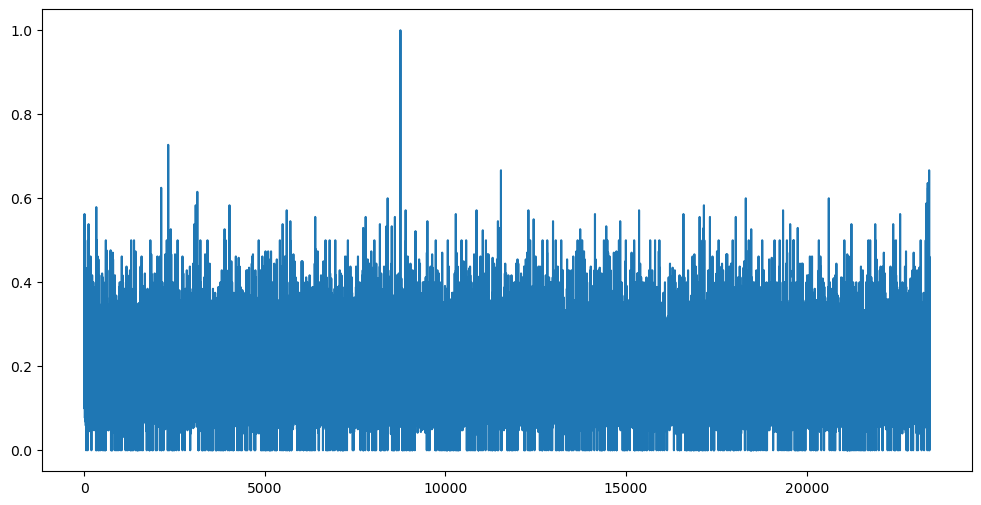

In [99]:
# plot probabilities of type 1
plt.figure(figsize=(12, 6))
plt.plot(probabilities.index, probabilities[1], label='Type 1')
plt.show()

# Sampling Price

In [101]:
probabilities.shape

(23399, 8)

In [102]:
check = pd.DataFrame(probabilities)
check['Time'] = merge_df['Time']
check.shape

(23399, 9)

In [103]:
check.head()

,1,2,5,6,7,8,4,3,Time
0.0,0.333333,0.133333,0.133333,0.333333,0.000000,0.066667,0.0,0.0,34200.004241
1.0,0.200000,0.300000,0.100000,0.150000,0.150000,0.100000,0.0,0.0,34200.004261
2.0,0.111111,0.222222,0.166667,0.333333,0.055556,0.111111,0.0,0.0,34200.004447
3.0,0.100000,0.000000,0.200000,0.500000,0.200000,0.000000,0.0,0.0,34200.025552
4.0,0.111111,0.333333,0.055556,0.277778,0.111111,0.111111,0.0,0.0,34200.025580


In [104]:
merge_df.head()

price_sell_df = merge_df[merge_df['calc_direction'] == 'Sell'][['Time','mid_price']]
price_buy_df = merge_df[merge_df['calc_direction'] == 'Buy'][['Time','mid_price']]

# Resampling the data
price_sell_df['Time'] = pd.to_datetime(price_sell_df['Time'], unit='s')
price_sell_df.set_index('Time', inplace=True)
price_sell_df = price_sell_df.resample('1min').ohlc() # resample the data in 1 minute bins
# only take the mid price
price_sell_df = price_sell_df['mid_price']
price_sell_df = price_sell_df.add_suffix('_mid_price')
price_sell_df.head()

,open_mid_price,high_mid_price,low_mid_price,close_mid_price
Time,,,,
1970-01-01 09:30:00,5856350.0,5858500.0,5853100.0,5855100.0
1970-01-01 09:31:00,5855100.0,5856250.0,5847450.0,5850050.0
1970-01-01 09:32:00,5851950.0,5854550.0,5849400.0,5854550.0
1970-01-01 09:33:00,5854800.0,5870650.0,5852950.0,5868650.0
1970-01-01 09:34:00,5868650.0,5877200.0,5868500.0,5873000.0


In [105]:
# Resample
price_buy_df['Time'] = pd.to_datetime(price_buy_df['Time'], unit='s')
price_buy_df.set_index('Time', inplace=True)
price_buy_df = price_buy_df.resample('1min').ohlc() # resample the data in 1 minute bins
# only take the mid price
price_buy_df = price_buy_df['mid_price']
price_buy_df = price_buy_df.add_suffix('_mid_price')
price_buy_df.head()

,open_mid_price,high_mid_price,low_mid_price,close_mid_price
Time,,,,
1970-01-01 09:30:00,5856200.0,5858500.0,5853100.0,5854950.0
1970-01-01 09:31:00,5855100.0,5856250.0,5847350.0,5850750.0
1970-01-01 09:32:00,5850350.0,5854800.0,5849250.0,5854800.0
1970-01-01 09:33:00,5855400.0,5870450.0,5852950.0,5868500.0
1970-01-01 09:34:00,5868650.0,5877200.0,5868600.0,5873000.0


In [106]:
price_sell_df['returns'] = (price_sell_df['close_mid_price'] - price_sell_df['close_mid_price'].shift(1)) / price_sell_df['close_mid_price'].shift(1)

price_buy_df['returns'] = (price_buy_df['close_mid_price'] - price_buy_df['close_mid_price'].shift(1)) / price_buy_df['close_mid_price'].shift(1)

In [107]:
from scipy.stats import norm, weibull_min


# def sampling_price(df, df_price_col ,num_samples=390):
#     seed = 42
#     np.random.seed(seed)
#     #Compute w/mle
#     mean_returns_mle, std_returns_mle = norm.fit(df[df_price_col].dropna())

#     #Generate sample directly from the gaussian distribution
#     sample_gaussian_returns = np.random.normal(loc=mean_returns_mle, scale=std_returns_mle, size=num_samples)
#     #print(f"First sample return {sample_gaussian_returns[0]}")
#     # Simulate Stock Price trajectory
#     # Start from the last price in the lob dataset
#     start_price = df['close_mid_price'].iloc[0] #-1
#     # Initialize the simulated price list
#     sim_prices = [start_price]

#     for r in sample_gaussian_returns:
#         #calculate the new price based on the previous price
#         new_price = sim_prices[-1] * (1 + r)
#         #append to the list
#         sim_prices.append(new_price)
#     return sim_prices

def sampling_return_price(df, df_price_col, num_samples=390):
    seed = 42
    np.random.seed(seed)
    #Compute w/mle 
    mean_returns_mle, std_returns_mle = norm.fit(df[df_price_col].dropna()) #std_returns_mle

    #Generate sample directly from the gaussian distribution
    sample_gaussian_returns = np.random.normal(loc=mean_returns_mle,scale=std_returns_mle ,size=num_samples) #scale=std_returns_mle
 
    return sample_gaussian_returns

import numpy as np
from scipy.stats import weibull_min

def sampling_return_price_weibull(df, df_price_col, num_samples=390):
    seed = 42
    np.random.seed(seed)
    
    # Drop NA values from the specified column
    data_clean = df[df_price_col].dropna()
    
    # Fit Weibull distribution to data
    # scipy's fit function returns the shape parameter (c), location parameter (loc), and scale parameter (scale) for the Weibull distribution
    c, loc, scale = weibull_min.fit(data_clean, floc=0)  # Here floc=0 fixes the location at zero, typical for Weibull

    # Generate samples directly from the fitted Weibull distribution
    sample_weibull_returns = weibull_min.rvs(c, loc, scale, size=num_samples)

    return sample_weibull_returns

In [108]:
# Sample the price for sell direction
sim_returns_sell_norm = sampling_return_price(price_sell_df, 'returns', num_samples=len(price_sell_df))
# Sample the price for buy direction
sim_returns_buy_norm = sampling_return_price(price_buy_df, 'returns', num_samples=len(price_buy_df))

# Sample the price for sell direction
sim_returns_sell_wei = sampling_return_price(price_sell_df, 'returns', num_samples=len(price_sell_df))
# Sample the price for buy direction
sim_returns_buy_wei = sampling_return_price(price_buy_df, 'returns', num_samples=len(price_buy_df))



In [109]:
sim_returns_sell_wei

array([ 2.03177576e-04, -1.01249351e-04,  2.75559037e-04,  6.95222833e-04,
       -1.47221330e-04, -1.47213459e-04,  7.22158558e-04,  3.32968804e-04,
       -2.60040989e-04,  2.25157414e-04, -2.57137236e-04, -2.58245704e-04,
        8.10421998e-05, -9.52243029e-04, -8.61936673e-04, -3.04538278e-04,
       -5.20541829e-04,  1.15697736e-04, -4.70294319e-04, -7.12060470e-04,
        6.67712689e-04, -1.43205120e-04, -2.58650708e-06, -7.18026714e-04,
       -2.95954200e-04,  1.82180087e-05, -5.86780884e-04,  1.45158962e-04,
       -3.22924927e-04, -1.74807840e-04, -3.23436920e-04,  8.53073947e-04,
       -4.14324275e-05, -5.42058500e-04,  3.59390210e-04, -6.20269017e-04,
        6.51737426e-05, -9.74483671e-04, -6.71732049e-04,  5.94194666e-05,
        3.19080640e-04,  4.71974111e-05, -9.04065816e-05, -1.79319239e-04,
       -7.43807422e-04, -3.80075480e-04, -2.55804941e-04,  4.71853319e-04,
        1.29779018e-04, -8.80213610e-04,  1.20413703e-04, -2.19580987e-04,
       -3.59497339e-04,  

In [110]:
# Sampling the Volumes
merge_df.head()

,ask_price_1,ask_size_1,bid_price_1,bid_size_1,ask_price_2,ask_size_2,bid_price_2,bid_size_2,ask_price_3,ask_size_3,...,bid_price_10,bid_size_10,Time,Type,OrderID,Size,Price,mid_price,calc_direction,event_type
0,5859400,200,5853300,18,5859800,200,5853000,150,5861000,200,...,5842700,300,34200.004241,1,16113575,18,5853300,5856350.0,Sell,1
1,5859400,200,5853300,18,5859800,200,5853200,18,5861000,200,...,5843800,200,34200.004261,1,16113584,18,5853200,5856350.0,Sell,1
2,5859400,200,5853300,18,5859800,200,5853200,18,5861000,200,...,5845300,300,34200.004447,1,16113594,18,5853100,5856350.0,Sell,1
3,5859100,18,5853300,18,5859400,200,5853200,18,5859800,200,...,5845300,300,34200.025552,1,16120456,18,5859100,5856200.0,Buy,2
4,5859100,18,5853300,18,5859200,18,5853200,18,5859400,200,...,5845300,300,34200.025580,1,16120480,18,5859200,5856200.0,Buy,2


# Sampling the Volumes

In [111]:
vol_buy_lim_df = merge_df[merge_df['event_type'] == 1][['Time','Size']]
vol_sell_lim_df = merge_df[merge_df['event_type'] == 2][['Time','Size']]
vol_buy_mrkt_df = merge_df[merge_df['event_type'] == 7][['Time','Size']]
vol_sell_mrkt_df = merge_df[merge_df['event_type'] == 8][['Time','Size']]

# Resample
vol_buy_lim_df['Time'] = pd.to_datetime(vol_buy_lim_df['Time'], unit='s')
vol_buy_lim_df.set_index('Time', inplace=True)
vol_buy_lim_df = vol_buy_lim_df.resample('1min').ohlc() # resample the data in 1 minute bins
# only take the Volume/Size
vol_buy_lim_df = vol_buy_lim_df['Size']
vol_buy_lim_df = vol_buy_lim_df.add_suffix('Size')
vol_buy_lim_df.head()

# Resample
vol_sell_lim_df['Time'] = pd.to_datetime(vol_sell_lim_df['Time'], unit='s')
vol_sell_lim_df.set_index('Time', inplace=True)
vol_sell_lim_df = vol_sell_lim_df.resample('1min').ohlc() # resample the data in 1 minute bins
# only take the Volume/Size
vol_sell_lim_df = vol_sell_lim_df['Size']
vol_sell_lim_df = vol_sell_lim_df.add_suffix('Size')
vol_sell_lim_df.head()

# Resample
vol_buy_mrkt_df['Time'] = pd.to_datetime(vol_buy_mrkt_df['Time'], unit='s')
vol_buy_mrkt_df.set_index('Time', inplace=True)
vol_buy_mrkt_df = vol_buy_mrkt_df.resample('1min').ohlc() # resample the data in 1 minute bins
# only take the Volume/Size
vol_buy_mrkt_df = vol_buy_mrkt_df['Size']
vol_buy_mrkt_df = vol_buy_mrkt_df.add_suffix('Size')
vol_buy_mrkt_df.head()

# Resample
vol_sell_mrkt_df['Time'] = pd.to_datetime(vol_sell_mrkt_df['Time'], unit='s')
vol_sell_mrkt_df.set_index('Time', inplace=True)
vol_sell_mrkt_df = vol_sell_mrkt_df.resample('1min').ohlc() # resample the data in 1 minute bins
# only take the Volume/Size
vol_sell_mrkt_df = vol_sell_mrkt_df['Size']
vol_sell_mrkt_df = vol_sell_mrkt_df.add_suffix('Size')
vol_sell_mrkt_df.head()


,openSize,highSize,lowSize,closeSize
Time,,,,
1970-01-01 09:30:00,25.0,300.0,2.0,7.0
1970-01-01 09:31:00,84.0,100.0,2.0,100.0
1970-01-01 09:32:00,47.0,100.0,15.0,100.0
1970-01-01 09:33:00,97.0,449.0,1.0,449.0
1970-01-01 09:34:00,3.0,390.0,2.0,100.0


In [112]:
from scipy.stats import gamma

def sampling_volume_gamma(df, df_vol_col, num_samples=390):
    seed = 42
    np.random.seed(seed)
    
    # Drop NA values from the specified column
    data_clean = df[df_vol_col].dropna()
    
    # Fit Weibull distribution to data
    # scipy's fit function returns the shape parameter (c), location parameter (loc), and scale parameter (scale) for the Weibull distribution
    c, loc, scale = gamma.fit(data_clean)  # Here floc=0 fixes the location at zero, typical for Weibull

    # Generate samples directly from the fitted Weibull distribution
    sample_gamma_volume = gamma.rvs(c, loc, scale, size=num_samples)

    return sample_gamma_volume

In [113]:
vol_buy_lim_df.head()

,openSize,highSize,lowSize,closeSize
Time,,,,
1970-01-01 09:30:00,18,300,1,2
1970-01-01 09:31:00,100,500,2,100
1970-01-01 09:32:00,100,2000,1,253
1970-01-01 09:33:00,253,400,1,100
1970-01-01 09:34:00,100,700,2,200


In [114]:
# Sample the price for sell direction
sim_vol_buy_lim_gam = sampling_volume_gamma(vol_buy_lim_df, 'closeSize', num_samples=len(vol_buy_lim_df))

sim_vol_sell_lim_gam = sampling_volume_gamma(vol_sell_lim_df, 'closeSize', num_samples=len(vol_sell_lim_df))

sim_vol_buy_mrkt_gam = sampling_volume_gamma(vol_buy_mrkt_df, 'closeSize', num_samples=len(vol_buy_mrkt_df))

sim_vol_sell_mrkt_gam = sampling_volume_gamma(vol_sell_mrkt_df, 'closeSize', num_samples=len(vol_sell_mrkt_df))


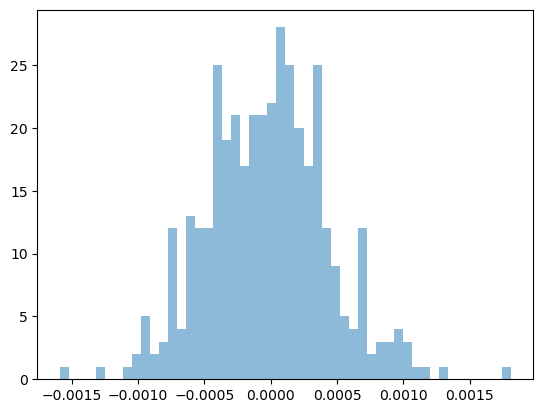

In [115]:
# plot the distribution of the sim_vol_buy_lim_gam
plt.hist(sim_returns_buy_wei, bins=50, alpha=0.5, label='Volume Buy Limit')
plt.show()

# Algorithm putting everything together

In [116]:
poisson_df = check

#set Time as index in poisson_df
poisson_df.set_index('Time', inplace=True)

print(poisson_df.shape)
poisson_df.head()

(23399, 8)


,1,2,5,6,7,8,4,3
Time,,,,,,,,
34200.004241,0.333333,0.133333,0.133333,0.333333,0.000000,0.066667,0.0,0.0
34200.004261,0.200000,0.300000,0.100000,0.150000,0.150000,0.100000,0.0,0.0
34200.004447,0.111111,0.222222,0.166667,0.333333,0.055556,0.111111,0.0,0.0
34200.025552,0.100000,0.000000,0.200000,0.500000,0.200000,0.000000,0.0,0.0
34200.025580,0.111111,0.333333,0.055556,0.277778,0.111111,0.111111,0.0,0.0


In [117]:
print(merge_df.shape)
merge_df.head()

(430266, 48)


,ask_price_1,ask_size_1,bid_price_1,bid_size_1,ask_price_2,ask_size_2,bid_price_2,bid_size_2,ask_price_3,ask_size_3,...,bid_price_10,bid_size_10,Time,Type,OrderID,Size,Price,mid_price,calc_direction,event_type
0,5859400,200,5853300,18,5859800,200,5853000,150,5861000,200,...,5842700,300,34200.004241,1,16113575,18,5853300,5856350.0,Sell,1
1,5859400,200,5853300,18,5859800,200,5853200,18,5861000,200,...,5843800,200,34200.004261,1,16113584,18,5853200,5856350.0,Sell,1
2,5859400,200,5853300,18,5859800,200,5853200,18,5861000,200,...,5845300,300,34200.004447,1,16113594,18,5853100,5856350.0,Sell,1
3,5859100,18,5853300,18,5859400,200,5853200,18,5859800,200,...,5845300,300,34200.025552,1,16120456,18,5859100,5856200.0,Buy,2
4,5859100,18,5853300,18,5859200,18,5853200,18,5859400,200,...,5845300,300,34200.025580,1,16120480,18,5859200,5856200.0,Buy,2


In [118]:
poisson_df.shape

(23399, 8)

In [119]:
merge_df.shape

(430266, 48)

In [120]:
import random

def simulate_market(start_price, poisson_df, 
                    sim_returns_buy_wei, sim_returns_sell_wei, 
                    sim_vol_buy_lim_gam, sim_vol_sell_lim_gam, 
                    sim_vol_buy_mrkt_gam, sim_vol_sell_mrkt_gam):
    
    results = []
    
    # Iterate through each row and column properly
    for index, row in poisson_df.iterrows():
        for col in poisson_df.columns:
            if row[col] > 0.5:  # Check if the probability is greater than 0.5
                order_type = int(col)  # Assuming column names are strings that represent integers
                if order_type == 1:
                    # Buy Limit
                    return_price = random.choice(sim_returns_buy_wei)
                    price = start_price * (1 + return_price)
                    volume = random.choice(sim_vol_buy_lim_gam)
                    results.append({'Time': index, 'OrderType': 1, 'Price': price, 'Volume': volume})

                elif order_type == 2:
                    # Sell Limit
                    return_price = random.choice(sim_returns_sell_wei)
                    price = start_price * (1 + return_price)
                    volume = random.choice(sim_vol_sell_lim_gam)
                    results.append({'Time': index, 'OrderType': 2, 'Price': price, 'Volume': volume})

                elif order_type == 7:
                    # Buy Market
                    return_price = random.choice(sim_returns_buy_wei)
                    price = start_price * (1 + return_price)
                    volume = random.choice(sim_vol_buy_mrkt_gam)
                    results.append({'Time': index, 'OrderType': 7, 'Price': price, 'Volume': volume})

                elif order_type == 8:
                    # Sell Market
                    return_price = random.choice(sim_returns_sell_wei)
                    price = start_price * (1 + return_price)
                    volume = random.choice(sim_vol_sell_mrkt_gam)
                    results.append({'Time': index, 'OrderType': 8, 'Price': price, 'Volume': volume})

                    # Update the starting price for the next iteration based on the last transaction
                    start_price = price

    return results


In [121]:
sim_data = simulate_market(585.0, poisson_df, sim_returns_buy_wei, sim_returns_sell_wei, sim_vol_buy_lim_gam, sim_vol_sell_lim_gam, sim_vol_buy_mrkt_gam, sim_vol_sell_mrkt_gam)
sim_data

[{'Time': 34200.201768069,
  'OrderType': 1,
  'Price': 584.7478638280227,
  'Volume': 0.9999999999999998},
 {'Time': 34200.271739507,
  'OrderType': 1,
  'Price': 585.0797313613243,
  'Volume': 0.9999999999999998},
 {'Time': 34200.271739507,
  'OrderType': 2,
  'Price': 584.7826456437015,
  'Volume': 53.66867159203083},
 {'Time': 34200.271739507,
  'OrderType': 2,
  'Price': 584.9694995606602,
  'Volume': 47.16693116477458},
 {'Time': nan,
  'OrderType': 2,
  'Price': 584.7528474989946,
  'Volume': 11.22101835693137},
 {'Time': 34200.275072491,
  'OrderType': 1,
  'Price': 584.632813015621,
  'Volume': 0.9999999999999998},
 {'Time': nan,
  'OrderType': 2,
  'Price': 585.1557769783334,
  'Volume': 149.2925177248176},
 {'Time': nan,
  'OrderType': 2,
  'Price': 584.8383398280993,
  'Volume': 22.928186763690526},
 {'Time': 34200.275072491,
  'OrderType': 2,
  'Price': 585.3461564040033,
  'Volume': 67.53834164993431},
 {'Time': nan,
  'OrderType': 2,
  'Price': 585.0446296159527,
  'Volu

In [122]:
# Convert the simulation data to a DataFrame
sim_df = pd.DataFrame(sim_data)
sim_df.head(1000)

,Time,OrderType,Price,Volume
0,34200.201768,1,584.747864,1.000000
1,34200.271740,1,585.079731,1.000000
2,34200.271740,2,584.782646,53.668672
3,34200.271740,2,584.969500,47.166931
4,NaN,2,584.752847,11.221018
...,...,...,...,...
360,35109.979511,1,585.002606,1.000000
361,35109.994335,1,585.123983,1.000000
362,35109.994608,1,585.067720,1.000000
363,35109.996324,1,584.245579,1.000000


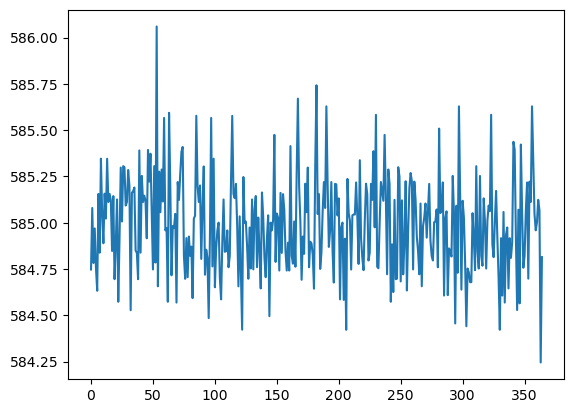

In [123]:
plot = sim_df['Price'].plot()

In [124]:
sim_df['OrderType'].value_counts()

OrderType
2    303
1     62
Name: count, dtype: int64

<Axes: >

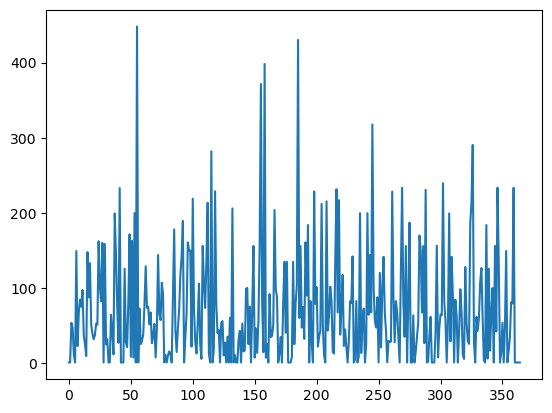

In [125]:
sim_df['Volume'].plot()